## import libraries

In [1]:
# basic operations
import os
import re

import pickle

# data analysis/management/manipulation
import numpy as np
import pandas as pd

# data visualisation

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('display.max_colwidth', None)

In [2]:
df_score= pickle.load(open("/Users/nicole/Documents/ARP/code/NLP/df_score.pkl", "rb"))

In [4]:
## taking only data starting from 2019
df = df_score[df_score['date'] >= '2019-01-01']


In [5]:
df['date'] = pd.to_datetime(df['date'])

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
df.head()

,date,month_year,tweet,brand,clean_tweet,topic_n,prob,token,score,class,class_
2,2019-01-17,2019-01,"What a great start to a Thursday morning! Congratulations to a the lovely Edward &amp; Bridie Fitzgerald who called to collect their recent @Midletonjon draw win, this racing red #seatmii! #winners #thursdaymorning #thursdayvibes https://t.co/hRFExZ8Jqn",seat,what a great start to a thursday morning congratulations to a the lovely edward amp bridie fitzgerald who called to collect their recent draw win this racing red #seatmii #winners #thursdaymorning #thursdayvibes,7,0.190452,"[great, start, thursday, morning, congratulation, lovely, edward, bridie, fitzgerald, call, collect, recent, draw, win, racing, red, seatmii, winner, thursdaymorne, thursdayvibe]",0.071265,7.0,positive
3,2019-01-29,2019-01,"Someone else had been lucky in an @AutoExpress competition! seatuk #seat #mii #seatmii #seatmiiautoexpress #autoexpress #carsofinstagram #luckycolleague @ Edinburgh, United Kingdom https://t.co/PWnQd9BBHG",seat,someone else had been lucky in an competition seatuk #seat #mii #seatmii #seatmiiautoexpress #autoexpress #carsofinstagram #luckycolleague edinburgh united kingdom,9,0.142857,"[lucky, competition, seatuk, seat, mii, seatmii, seatmiiautoexpress, autoexpress, carsofinstagram, luckycolleague, edinburgh, united, kingdom]",0.059722,5.0,positive
4,2019-01-31,2019-01,"We have the new #SEATMii available now with 0% APR Representative.* Plus, right now, you can get £500 extra off when you download an #easymoveevent voucher! *Finance subject to status. T&amp;Cs apply. Available to over 18's only. SEAT Financial Service https://t.co/Xup2HyyzZp https://t.co/b73vZGM3Rz",seat,we have the new #seatmii available now with 0 apr representative plus right now you can get £500 extra off when you download an #easymoveevent voucher finance subject to status t amp cs apply available to over 18's only seat financial service,7,0.215336,"[new, seatmii, available, apr, representative, plus, right, extra, download, easymoveevent, voucher, finance, subject, status, t, cs, apply, available, seat, financial, service]",0.139158,15.0,positive
5,2019-02-22,2019-02,@SEATItalia @SEATofficial #seatmii #frline my baby ♡ https://t.co/feH0tze2yk,seat,#seatmii #frline my baby ♡,7,0.145083,"[seatmii, frline, baby, ♡]",0.016547,0.0,negative
6,2019-03-06,2019-03,"Still searching for that perfect #firstcar? With that ideal mix of style and smarts? Well look no further! This #SEATMii Design is available now for just £7,490. Send your best contact details through via direct message now to enquire on this vehicle! https://t.co/PCI98MWxkf https://t.co/nV6STgoRVV",seat,still searching for that perfect #firstcar with that ideal mix of style and smarts well look no further this #seatmii design is available now for just £7 490 send your best contact details through via direct message now to enquire on this vehicle,7,0.211444,"[search, perfect, firstcar, ideal, mix, style, smart, look, seatmii, design, available, send, good, contact, detail, direct, message, enquire]",0.204137,16.0,positive


## topic composition

In [7]:
topic_df = pd.DataFrame({
    "topic_n" : range(0, 10),
    'topic': np.nan
})

topic_df.loc[0, 'topic'] = 'Car Production'
topic_df.loc[1, 'topic'] = 'Battery'
topic_df.loc[2, 'topic'] = 'Charging'
topic_df.loc[3, 'topic'] = 'Renewable Energy'
topic_df.loc[4, 'topic'] = 'Automotive News'
topic_df.loc[5, 'topic'] = 'Expense Related'
topic_df.loc[6, 'topic'] = 'Test Drive, Reviews and Ads'
topic_df.loc[7, 'topic'] = 'Noise'
topic_df.loc[8, 'topic'] = 'Car Interior Design'
topic_df.loc[9, 'topic'] = 'Mile Range'

topic_df

,topic_n,topic
0,0,Car Production
1,1,Battery
2,2,Charging
3,3,Renewable Energy
4,4,Automotive News
5,5,Expense Related
6,6,"Test Drive, Reviews and Ads"
7,7,Noise
8,8,Car Interior Design
9,9,Mile Range


In [8]:
df = pd.merge(df, topic_df, how = 'left', on = 'topic_n')

In [9]:
df1 = df.loc[(df['topic'] != 'Noise') &(df['topic'] != 'Car Production') & (df['topic'] != 'Automotive News'), ]

In [10]:
df1.loc[df1['brand'] == 'ev', 'brand'] = 'Electric Vehicle'
df1.loc[df1['brand'] == 'hondae', 'brand'] = 'honda'


/opt/anaconda3/envs/FCA3-env/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [11]:
df1.brand.value_counts()

Electric Vehicle    21328
honda               10525
renault              8757
mini                 5128
fiat                 3051
smart                1230
seat                  106
Name: brand, dtype: int64

In [13]:
def topic_plot(brand):
    tmp1 = df1[df1['brand'] == brand].groupby(['topic', 'month_year'])['tweet'].count().reset_index()

    tmp1 = tmp1.sort_values(by = ['month_year', 'topic'])

    tmp1['cumsum'] = tmp1['tweet'].cumsum()

    tmp2 = pd.pivot_table(tmp1, values = 'tweet', index = ['month_year'], columns = ['topic'], aggfunc = np.sum, fill_value=0)
    # get % 
    tmp2_divide = tmp2.divide(tmp2.sum(axis = 1), axis = 0)

    fields = tmp2.columns.tolist()
    labels = tmp2.columns.tolist()

    # figure 1
    fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(16, 6))

    # bottom = len(tmp2) * [0]
    # for idx, topic in enumerate(fields):
    #     ax1.bar(tmp2.index, tmp2[topic], bottom = bottom, label = labels)
    #     bottom = bottom + tmp2[topic]

    # # remove spines
    # ax1.spines['right'].set_visible(False)
    # ax1.spines['bottom'].set_visible(False)
    # ax1.spines['top'].set_visible(False)
    # ax1.spines['bottom'].set_visible(False)

    # ax1.set_xticklabels([])
    # ax1.set_ylabel('Tweet Count')

    # figure 2 
    tmp2_divide.plot(kind = 'area', stacked = True, ax = ax2, legend = True)

    # remove spines
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    # ax2.legend(loc = 'best', bbox_to_anchor=(1.1, 0.3), frameon = False)
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Topic Distribution %')


    # figure 3 

    tmp3 = df1.groupby(['brand', 'topic', 'month_year'])['tweet'].agg('count').unstack()

    tmp4 = tmp3.iloc[tmp3.index.get_level_values('brand') == brand].droplevel(0, axis = 0)
    tmp4.T.plot(kind = 'line', ax = ax3)

    ax3.spines['right'].set_visible(False)
    ax3.spines['bottom'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['left'].set_visible(False)

    ax3.set_xlabel('Month')

    ax3.set_yticks([])
    
    ax2.legend(frameon = False, bbox_to_anchor=(2.76, 0.63))
    ax3.legend(frameon = False, bbox_to_anchor=(1.1, 0.3))
   
    title = brand.capitalize()
    
    ax3.set_title('Topic Distribution Change - ' + title)
    ax2.set_title('Topic Distribution - ' + title)

    
    #plt.savefig(brand+'.png', bbox_inches='tight')



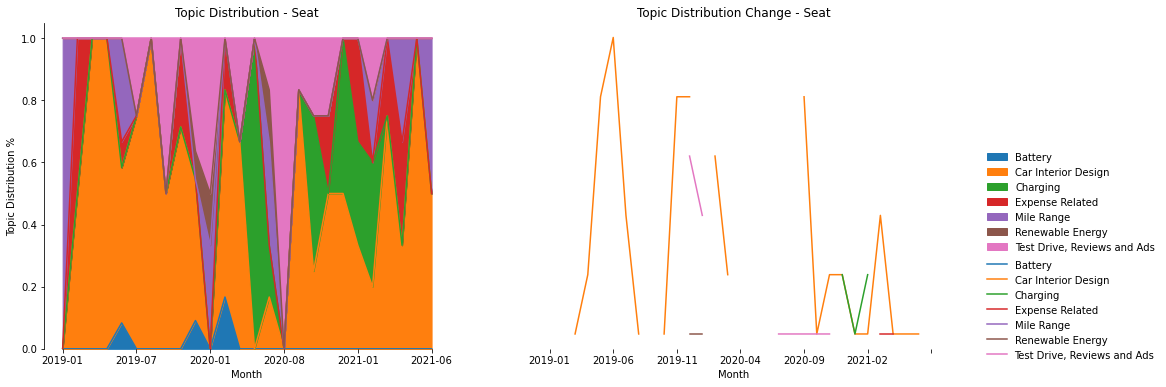

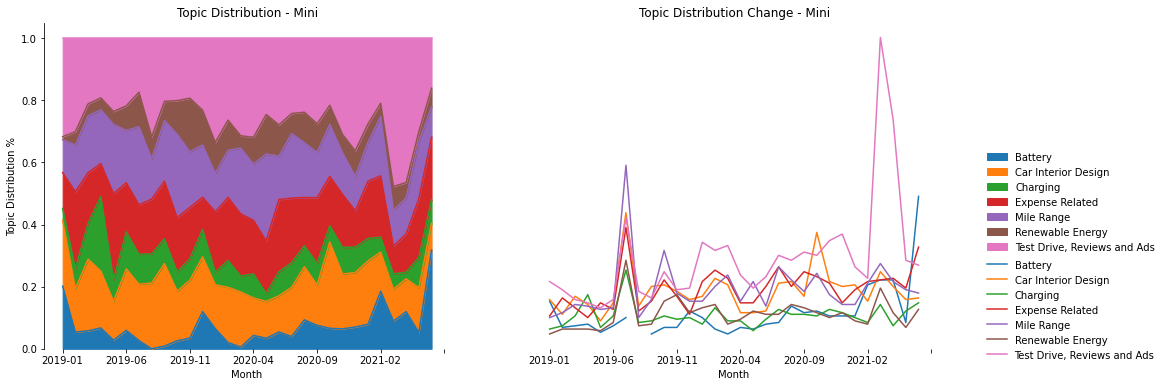

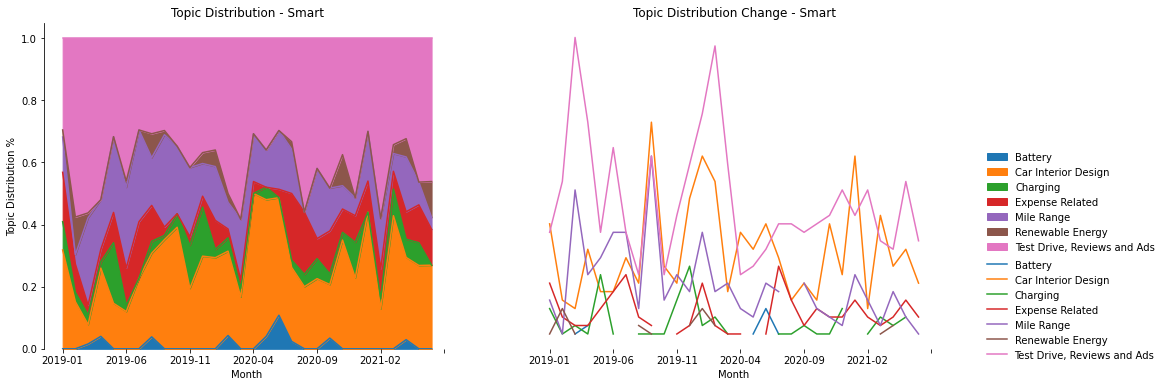

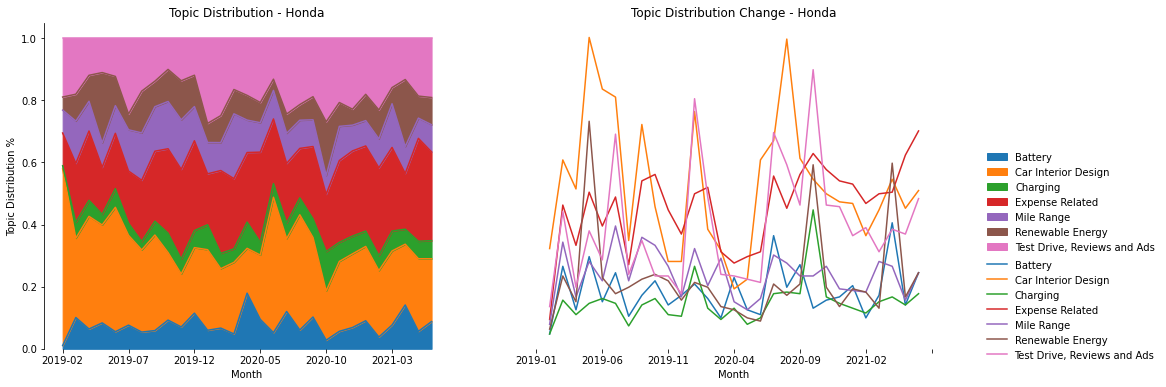

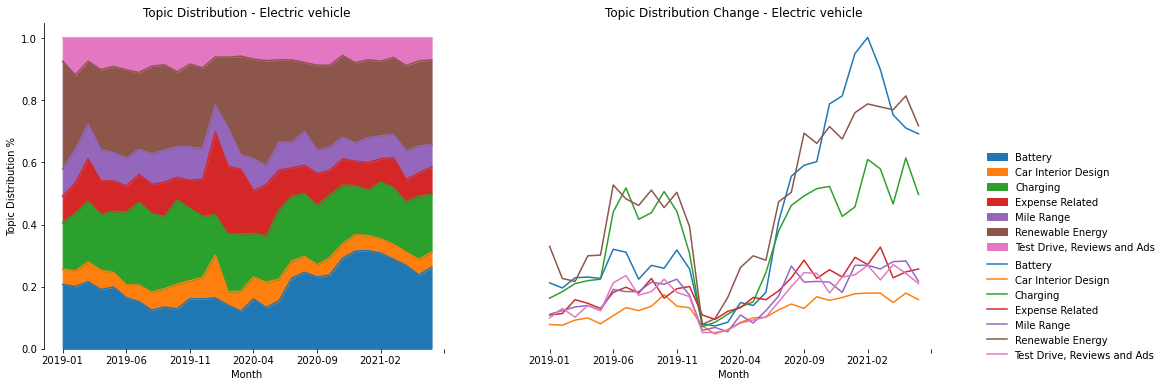

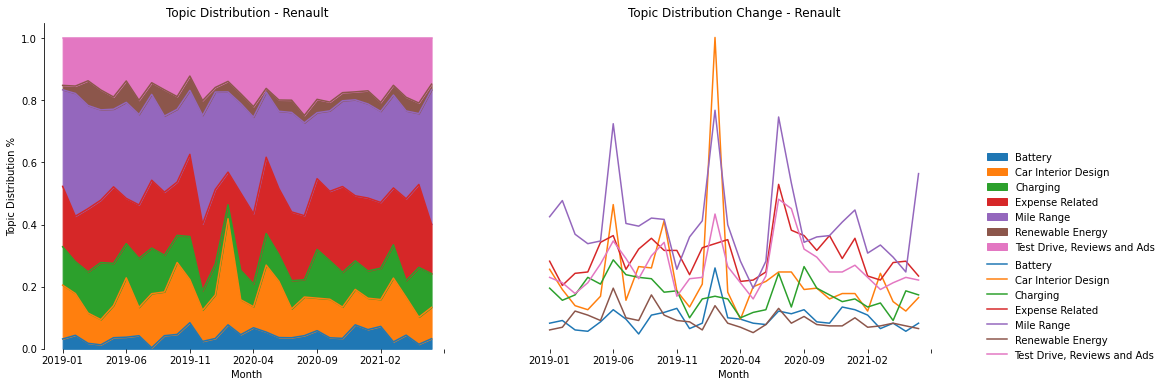

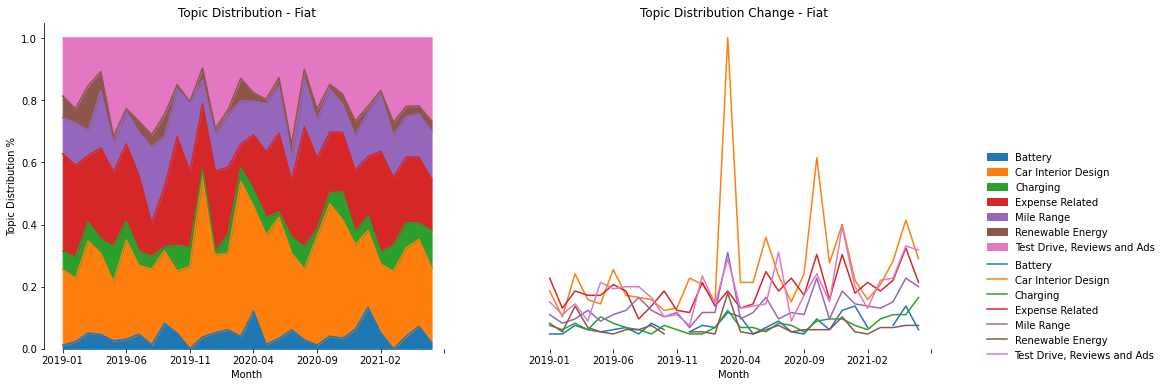

In [14]:
for brand in df1.brand.unique():
    topic_plot(brand)

## general sentiment score plot

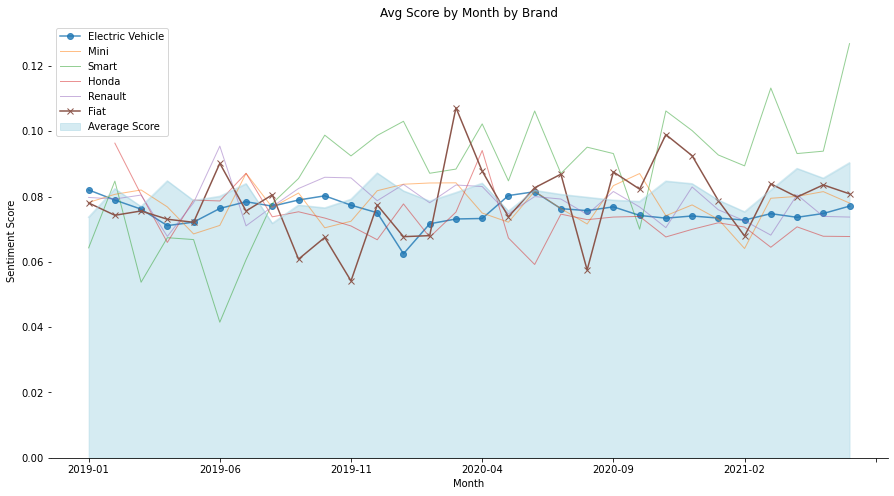

In [13]:
fig,ax = plt.subplots(figsize = (15, 8))

tmp = df1.groupby(['brand', 'month_year'])['score'].agg('mean').unstack()

valid_markers = mpl.markers.MarkerStyle.filled_markers
 
markers = np.random.choice(valid_markers, tmp.shape[0], replace=False)

tmp.xs('Electric Vehicle').plot(kind = 'line', ax = ax, marker = 'o', alpha = 0.8)

markers = ['+', '*', 's', 'o','v', 'p', '<', 'h','x', 'd']

l = ['mini', 'smart', 'honda', 'renault']
for i, brand in enumerate(l):
    tmp.xs(brand).plot(kind = 'line', ax = ax, lw = 1, alpha = 0.5, label = brand.capitalize())

tmp.xs('fiat').plot(kind = 'line', ax = ax, marker = 'x', label = 'Fiat')
tmp.mean(axis = 0).plot(kind = 'area', ax = ax, color = 'lightblue', alpha = 0.5,  label = 'Average Score')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Score')

plt.title('Avg Score by Month by Brand')
plt.ylim(ymin=0)

plt.legend(loc='best')
plt.savefig('avgscore_all.png')

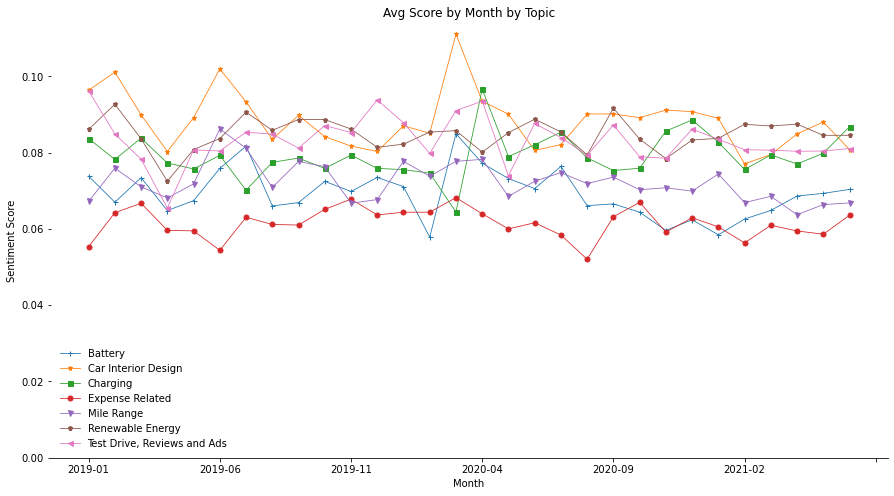

In [206]:
tmp = df1.groupby(['topic', 'month_year'])['score'].agg('mean').unstack()
tmp

fig1,ax = plt.subplots(figsize = (15, 8))

tmp = df1.groupby(['topic', 'month_year'])['score'].agg('mean').unstack()

markers = ['+', '*', 's', 'o','v', 'p', '<', 'h','x', 'd']

l = tmp.index
for i, brand in enumerate(l):
    tmp.xs(brand).plot(kind = 'line', ax = ax, lw = 0.8, marker = markers[i], markersize =5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))


ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Score')
plt.ylim(ymin=0)

plt.title('Avg Score by Month by Topic')
plt.legend(loc='best', frameon = False)

## sentiment by brand

In [15]:
# def plot_sent(brand):
#     data = df1[df1['brand'] == brand]
#     tmp = data.set_index('date').groupby('topic').resample('QS')['score'].agg('mean').unstack()

#     fig, ax = plt.subplots(figsize = (10,6))

#     for i, topic in enumerate(tmp.index):
#         tmp.loc[topic, ].plot(ax = ax)

#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['bottom'].set_position(('axes', 0)) 

#     ax.set_xlabel('')
#     ax.set_ylabel('Sentiment Score')


#     plt.title('Avg Score by Quarter by topic by Brand: ' + brand.capitalize())

#     plt.legend(loc = 'best', bbox_to_anchor=(1.5 ,1), frameon = False)

In [16]:
# for brand in df1.brand.unique():
#     plot_sent(brand)

## sentiment change by brand by stage

In [17]:
df1_ = df1[df1['date']>= '2019-10-01']

In [18]:
df1_['stage'] = np.nan 

df1_.loc[(df1_['date']>= '2019-10-01') & (df1_['date']< '2020-04-01'),'stage'] = 1
df1_.loc[(df1_['date']>= '2020-04-01') & (df1_['date']< '2020-09-01'),'stage'] = 2
df1_.loc[(df1_['date']>= '2020-09-01') & (df1_['date']< '2020-11-01'),'stage'] = 3
df1_.loc[(df1_['date']>= '2020-11-01') & (df1_['date']< '2021-05-01'),'stage'] = 4
df1_.loc[(df1_['date']>= '2021-05-01') & (df1_['date']< '2021-07-01'),'stage'] = 5

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/FCA3-env/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [19]:
def sent_change(brand):

    tmp = df1_[df1_['brand'] == brand].groupby(['stage', 'topic'])['score'].agg('mean').unstack()

    fig, ax = plt.subplots(figsize = (10,6))

    for i, topic in enumerate(tmp.columns):
        plt.plot(tmp.index, tmp[topic], marker = 'o', markersize = 5, label = topic)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # ax.spines['bottom'].set_position(('data', 0))

    ax.set_xticks([1,2,3,4,5])
    ax.set_xticklabels(['Pre-Covid', '1st Round Lockdown', 'Tier4 Restriction', '2nd Round Lockdown', 'Post-Lockdown'])

    for i in tmp.index:
            ax.axvline(x = i, color = 'darkgray', ls = '--')

    plt.legend(loc = 'best', bbox_to_anchor=(1.0 ,1), frameon = False)
    plt.title('Sentiment Change - ' + brand.capitalize())
    #plt.savefig(brand + '_sentchange.png', bbox_inches='tight')


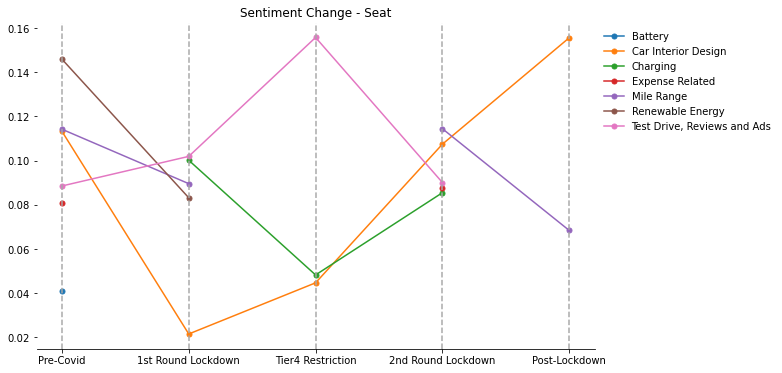

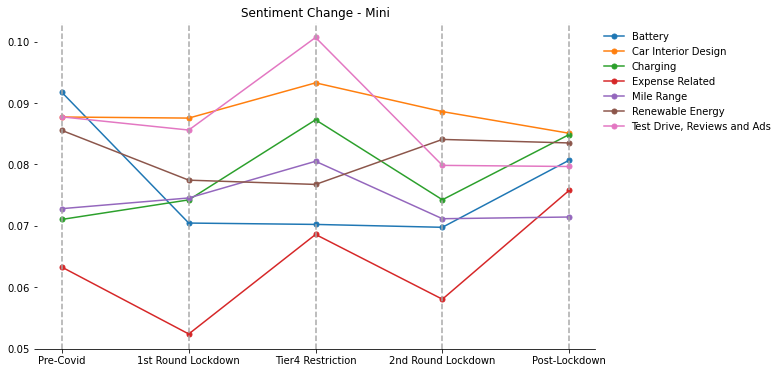

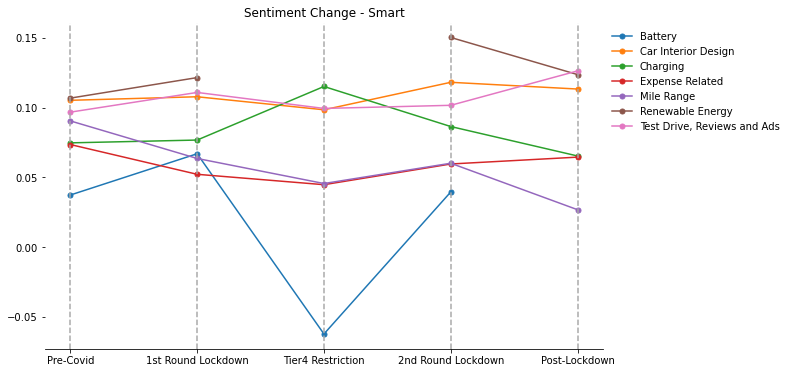

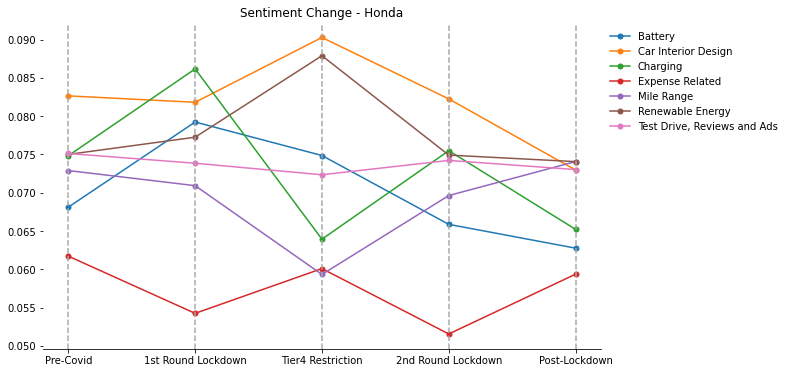

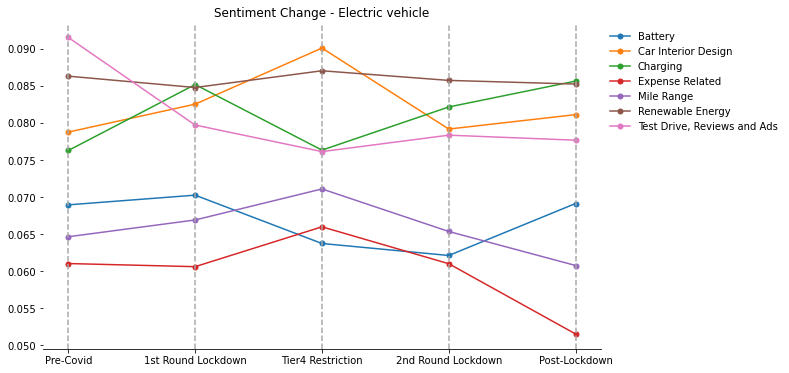

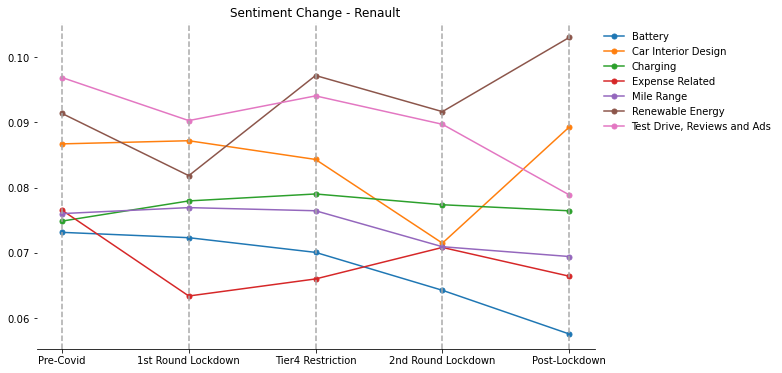

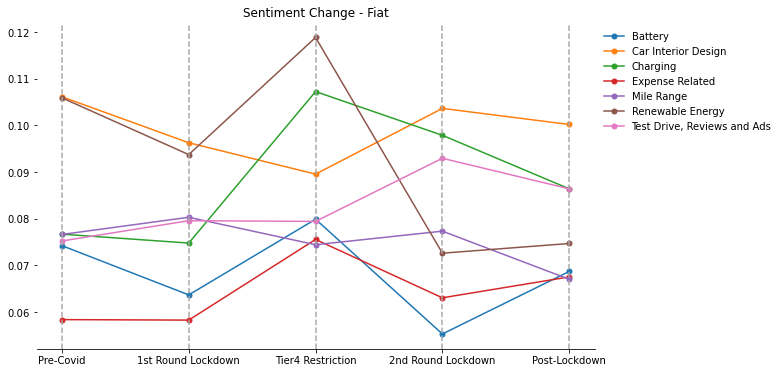

In [21]:
for brand in df1_.brand.unique():
    sent_change(brand)

## % of negative tweet for each topic

In [24]:
# def plot_neg(brand):

#     tmp = df1[df1['brand'] == brand].set_index('date').groupby(['topic','class_'])['tweet'].resample('QS').count().unstack()

#     tmp_divide = tmp.divide(tmp.groupby(level = 0).sum())

#     fig,ax = plt.subplots(figsize = (10,6))

#     tmp_divide.xs('negative', level = 1).transpose().plot(kind='bar', ax = ax)

#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)

#     ax.set_xticklabels(['2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2'], rotation = 60)
#     plt.legend (loc = 'upper right', bbox_to_anchor=(1.4, 1))
#     plt.title('topic associated with negative sentiment - ' + brand)


In [25]:
# for i in df1.brand.unique():
#     plot_neg(i)

## negative review %

In [26]:
def plot_count(brand):
    fig,ax = plt.subplots(figsize = (20,8))

    w = 0.8

    tmp = df1_[df1_['brand'] == brand].groupby(['stage','topic'])['tweet'].count().unstack()
    tmp.plot(kind = 'bar', ax = ax, alpha = 0.2, width = w, legend = False, cmap = 'tab10')

    tmp1 = df1_[(df1_['brand'] == brand) & (df1_['class_'] == 'negative')].groupby(['stage','topic'])['tweet'].count().unstack()
    tmp1.plot(kind = 'bar', ax = ax, width = w, cmap = 'tab10')

    perc = tmp1*100/tmp

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax2.spines['top'].set_visible(False)
    # ax2.spines['left'].set_visible(False)
    # ax2.spines['right'].set_visible(False)

    ax.set_xlabel('Stage', fontweight = 'bold')
    ax.set_ylabel('Count', fontweight = 'bold')

    stage = ['Pre-Covid', '1st Round Lockdown', 'Tier-4 Restriction', '2nd Round Lockdown', 'Post-Lockdown']
    ax.set_xticklabels(stage, rotation= 0)

    w1 = 0.11
    x_list = [-w1*3, -w1*2, -w1, 0, w1, w1*2, w1*3]
    max_lim = ax.axis()[3]

    for i in range(5):
        for j in range(7):       
            per = perc.iloc[i,j]
            if not np.isnan(per):
                ax.text(i+x_list[j], tmp.iloc[i, j] + max_lim/100,
                        '{}%'.format(round(per, 2)),
                        fontweight = 'bold', rotation = 90,
                        # color = 'Accent',
                        horizontalalignment = 'center')

    plt.title('Comment Counts - ' + brand.capitalize(), fontsize = 15)
    #plt.savefig(brand + 'neg.png')


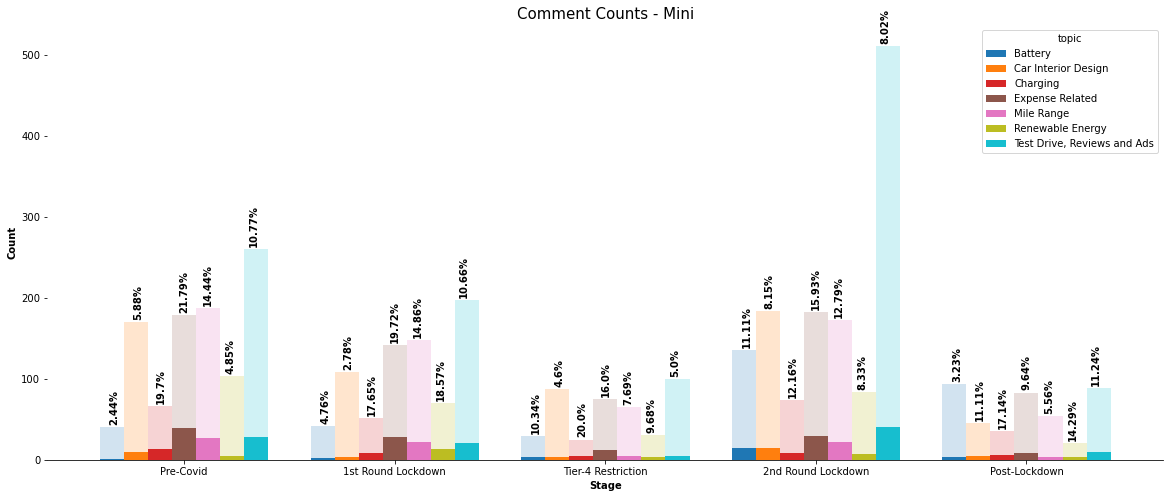

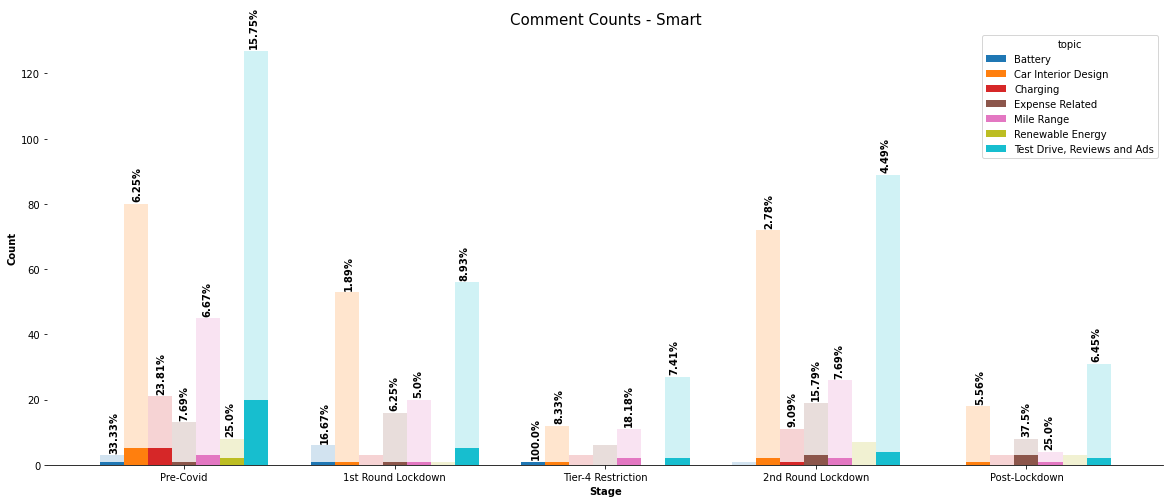

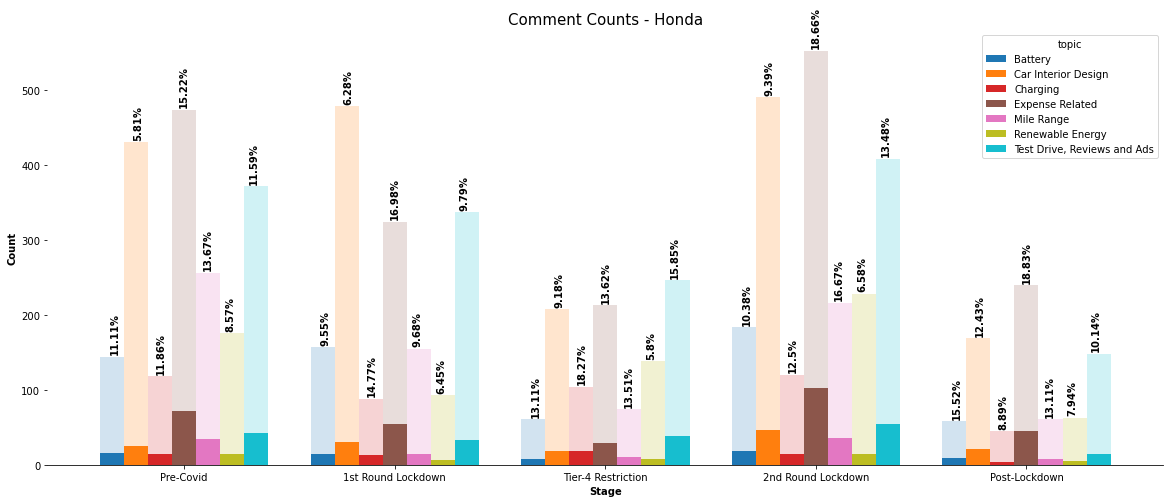

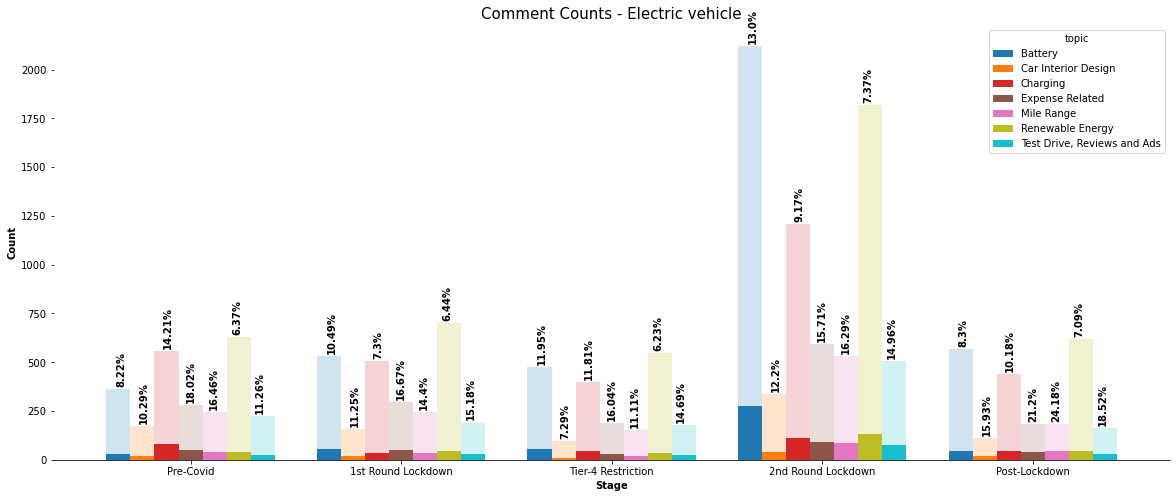

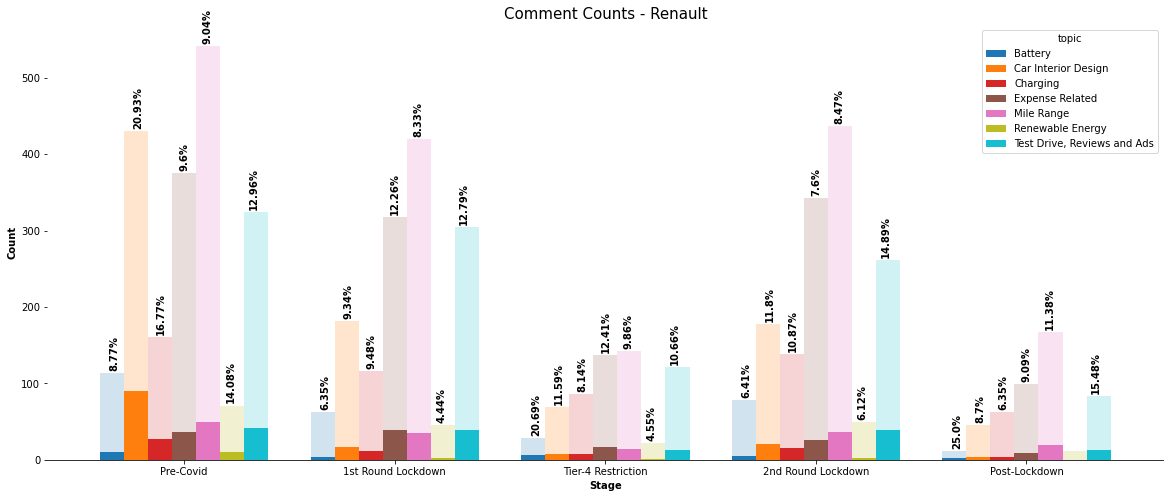

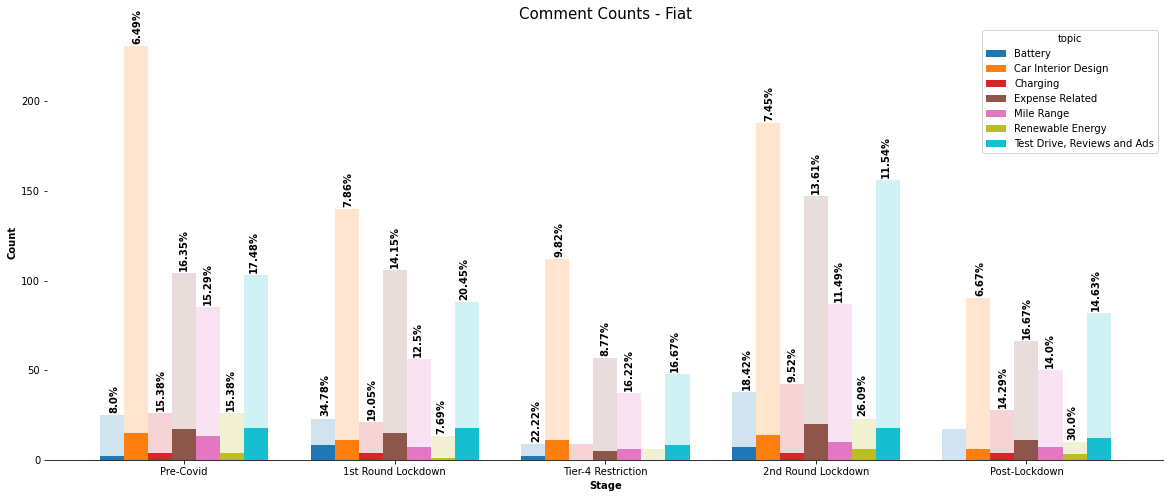

In [27]:
for i in df1_.brand.unique():
    if i != 'seat':
        plot_count(i)
